**P3 Q1**

temp4 BLACK mse:  103.93181679242214


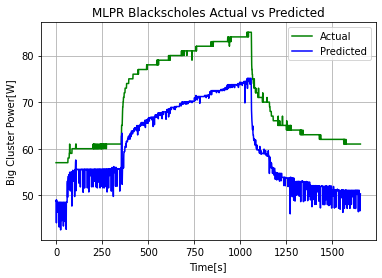

temp4 BODY mse:  161.36544727735193


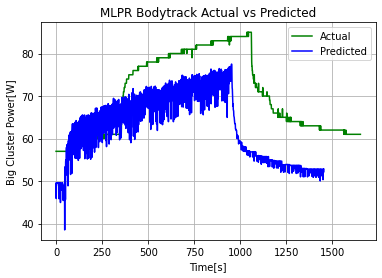

temp5 BLACK mse:  89.49879955540965
temp5 BODY mse:  101.70707338712174


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


temp6 BLACK mse:  119.45046652329523
temp6 BODY mse:  140.5026664721619
temp7 BLACK mse:  196.29117273628876
temp7 BODY mse:  241.75954992362537


In [24]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

train_dataset = pd.read_csv("/content/training_dataset.csv") 

test_blackscholes_dataset = pd.read_csv("/content/testing_blackscholes.csv") 

test_bodytrack_dataset = pd.read_csv("/content/testing_bodytrack.csv") 

tempList = ['temp4', 'temp5', 'temp6', 'temp7']

for tempX in tempList :
  y = train_dataset[tempX]

  X_train = train_dataset.drop([tempX,'total_watts','w_big', 'w_little', 'w_gpu','w_mem'], axis=1) 
  X_test_blacksholes = test_blackscholes_dataset.drop([tempX,'total_watts','w_big', 'w_little', 'w_gpu','w_mem'], axis=1) 
  X_test_bodytrack = test_bodytrack_dataset.drop([tempX,'total_watts','w_big', 'w_little', 'w_gpu','w_mem'], axis=1) 

  y_test_black = test_blackscholes_dataset[[tempX]]
  y_test_body = test_bodytrack_dataset[[tempX]]

  #normalize data
  my_scaler = StandardScaler() 
  X_train = my_scaler.fit_transform(X_train) 
  X_test_blacksholes = my_scaler.transform(X_test_blacksholes)
  X_test_bodytrack = my_scaler.transform(X_test_bodytrack)


  regressor = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
  regressor.fit(X_train, y)
  y_pred = regressor.predict(X_test_blacksholes)
  print(tempX,"BLACK mse: ",mean_squared_error(y_test_black, y_pred))
  if tempX == 'temp4':
    plt.plot(y_test_black,'g', label='Actual')
    plt.plot(y_pred,'b', label='Predicted')
    plt.legend()
    plt.xlabel('Time[s]')
    plt.ylabel('Big Cluster Power[W]')
    plt.grid(True)
    plt.title('MLPR Blackscholes Actual vs Predicted')
    plt.savefig('MLPR Blackscholes Actual vs Predicted.png')
    plt.show()
  y_pred = regressor.predict(X_test_bodytrack)
  print(tempX,"BODY mse: ",mean_squared_error(y_test_body, y_pred))
  if tempX == 'temp4':
    plt.plot(y_test_black,'g', label='Actual')
    plt.plot(y_pred,'b', label='Predicted')
    plt.legend()
    plt.xlabel('Time[s]')
    plt.ylabel('Big Cluster Power[W]')
    plt.grid(True)
    plt.title('MLPR Bodytrack Actual vs Predicted')
    plt.savefig('MLPR Bodytrack Actual vs Predicted.png')
    plt.show()

  
